# Data wrangling: energy and weather data

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

Import energy data csv file. Souce: https://www.kaggle.com/robikscube/hourly-energy-consumption

In [212]:
energy_data = pd.read_csv('../data/external/pjm_hourly_est.csv')

In [213]:
energy_data.head()

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
0,1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0
1,1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0
2,1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0
3,1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0
4,1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0


From the data source, it is noted that regions have changed over the years. Thus, the energy data do not have the same date range.

Convert datetime column to datetime type

In [214]:
energy_data['Datetime'] = pd.to_datetime(energy_data['Datetime'])

Now, check duplicates.

In [215]:
duplicated_date = energy_data.duplicated(subset='Datetime',keep=False)
energy_data[duplicated_date]

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
139480,2014-11-02 02:00:00,12994.0,8869.0,1623.0,2518.0,8555.0,1272.0,1554.0,6051.0,NaN,22935.0,4613.0,NaN
139481,2014-11-02 02:00:00,13190.0,9184.0,1634.0,2562.0,8562.0,1240.0,1566.0,6185.0,NaN,23755.0,4571.0,NaN
148264,2015-11-01 02:00:00,10785.0,8270.0,1324.0,2164.0,7392.0,1113.0,978.0,5653.0,NaN,21567.0,3927.0,NaN
148265,2015-11-01 02:00:00,10542.0,7923.0,1292.0,2257.0,7345.0,1138.0,944.0,5455.0,NaN,21171.0,3832.0,NaN
156904,2016-11-06 02:00:00,10964.0,7814.0,1334.0,2350.0,7924.0,1121.0,1042.0,5523.0,NaN,20795.0,4114.0,NaN
156905,2016-11-06 02:00:00,11008.0,8028.0,1364.0,2198.0,8145.0,1107.0,1028.0,5587.0,NaN,21692.0,4089.0,NaN
165712,2017-11-05 02:00:00,10596.0,8198.0,1449.0,2064.0,7677.0,1131.0,910.0,5573.0,NaN,21236.0,4042.0,NaN
165713,2017-11-05 02:00:00,10446.0,7878.0,1331.0,1044.0,7468.0,1105.0,900.0,5467.0,NaN,20666.0,3984.0,NaN


The duplicated dates are the same across all energy companies. Thus, this is unrelated to operations or data recording, but likely has to do with errors during data collection or processing. Since the energies are similar in duplicates, keep the first value.

In [216]:
energy_data.drop_duplicates(subset='Datetime', keep='first', inplace=True)

Here, the focus will be on the Chicago region (COMED = Commonwealth Edison), drop other energy companies

In [217]:
energy_data = energy_data[['Datetime','COMED']]

In [218]:
energy_data = energy_data.rename(columns={"Datetime": "datetime", "COMED": "energy"})

<AxesSubplot:xlabel='datetime'>

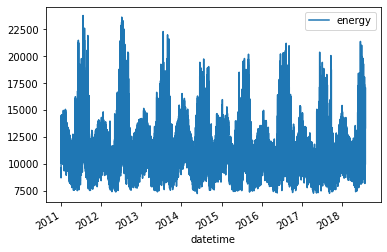

In [219]:
energy_data.plot(x='datetime',y='energy')

Import weather data csv file. Souce: https://www.kaggle.com/selfishgene/historical-hourly-weather-data

In [220]:
city_data = pd.read_csv('../data/external/city_attributes.csv')
humidity_data = pd.read_csv('../data/external/humidity.csv')
pressure_data = pd.read_csv('../data/external/pressure.csv')
temperature_data = pd.read_csv('../data/external/temperature.csv')
weather_describe_data = pd.read_csv('../data/external/weather_description.csv')
wind_direction_data = pd.read_csv('../data/external/wind_direction.csv')
wind_speed_data = pd.read_csv('../data/external/wind_speed.csv')

In [221]:
city_data.head()

,City,Country,Latitude,Longitude
0,Vancouver,Canada,49.249660,-123.119339
1,Portland,United States,45.523449,-122.676208
2,San Francisco,United States,37.774929,-122.419418
3,Seattle,United States,47.606209,-122.332069
4,Los Angeles,United States,34.052231,-118.243683


In [222]:
humidity_data.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


In [223]:
pressure_data.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1011.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,1001.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2,2012-10-01 14:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,986.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
3,2012-10-01 15:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,945.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
4,2012-10-01 16:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,904.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0


In [224]:
temperature_data.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [225]:
weather_describe_data.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,haze,NaN,NaN,NaN
1,2012-10-01 13:00:00,mist,scattered clouds,light rain,sky is clear,mist,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,overcast clouds,sky is clear,sky is clear,sky is clear,haze,sky is clear,sky is clear,sky is clear
2,2012-10-01 14:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,sky is clear,sky is clear,broken clouds,overcast clouds,sky is clear,overcast clouds
3,2012-10-01 15:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds
4,2012-10-01 16:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds


In [226]:
wind_direction_data.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,360.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,0.0,0.0,150.0,0.0,0.0,0.0,0.0,10.0,360.0,...,270.0,260.0,230.0,60.0,135.0,101.0,30.0,336.0,336.0,329.0
2,2012-10-01 14:00:00,6.0,4.0,147.0,2.0,0.0,0.0,8.0,9.0,360.0,...,270.0,260.0,230.0,60.0,157.0,315.0,30.0,336.0,336.0,329.0
3,2012-10-01 15:00:00,20.0,18.0,141.0,10.0,0.0,0.0,23.0,9.0,360.0,...,271.0,260.0,231.0,60.0,157.0,307.0,30.0,336.0,336.0,329.0
4,2012-10-01 16:00:00,34.0,31.0,135.0,17.0,0.0,0.0,37.0,9.0,360.0,...,272.0,260.0,233.0,60.0,157.0,294.0,30.0,336.0,336.0,329.0


In [227]:
wind_speed_data.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,4.0,7.0,4.0,3.0,1.0,0.0,8.0,2.0,2.0,2.0
2,2012-10-01 14:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,4.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
3,2012-10-01 15:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,3.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
4,2012-10-01 16:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,3.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0


The first row (2012-10-01 12:00:00) are mostly NaN, this is because only one city Eilat, Israel has a datapoint in it. Thus, it is likely that the parameters used were slightly different for Eilat when calling data via API. The observation is true for humidity, pressure, temperature, weather, wind direction, and wind speed data.

In the following steps, focus the data for Chicago.

In [228]:
humidity_data = humidity_data[['datetime','Chicago']]
humidity_data['datetime'] = pd.to_datetime(humidity_data['datetime'])

In [229]:
humidity_data = humidity_data.rename(columns={"Chicago": "humidity"})
humidity_data.head()

,datetime,humidity
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,71.0
2,2012-10-01 14:00:00,70.0
3,2012-10-01 15:00:00,70.0
4,2012-10-01 16:00:00,70.0


In [230]:
humidity_data.duplicated(subset='datetime').any()

False

In [231]:
pressure_data = pressure_data[['datetime','Chicago']]
pressure_data['datetime'] = pd.to_datetime(pressure_data['datetime'])

In [232]:
pressure_data = pressure_data.rename(columns={"Chicago": "pressure"})
pressure_data.head()

,datetime,pressure
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,1014.0
2,2012-10-01 14:00:00,1014.0
3,2012-10-01 15:00:00,1014.0
4,2012-10-01 16:00:00,1014.0


In [233]:
pressure_data.duplicated(subset='datetime').any()

False

In [234]:
temperature_data = temperature_data[['datetime','Chicago']]
temperature_data['datetime'] = pd.to_datetime(temperature_data['datetime'])

In [235]:
temperature_data = temperature_data.rename(columns={"Chicago": "temperature"})
temperature_data.head()

,datetime,temperature
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,284.010000
2,2012-10-01 14:00:00,284.054691
3,2012-10-01 15:00:00,284.177412
4,2012-10-01 16:00:00,284.300133


In [236]:
temperature_data.duplicated(subset='datetime').any()

False

In [237]:
weather_describe_data = weather_describe_data[['datetime','Chicago']]
weather_describe_data['datetime'] = pd.to_datetime(weather_describe_data['datetime'])

In [238]:
weather_describe_data = weather_describe_data.rename(columns={"Chicago": "weather"})
weather_describe_data.head()

,datetime,weather
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,overcast clouds
2,2012-10-01 14:00:00,overcast clouds
3,2012-10-01 15:00:00,overcast clouds
4,2012-10-01 16:00:00,overcast clouds


In [239]:
weather_describe_data.duplicated(subset='datetime').any()

False

In [240]:
wind_direction_data = wind_direction_data[['datetime','Chicago']]
wind_direction_data['datetime'] = pd.to_datetime(wind_direction_data['datetime'])

In [241]:
wind_direction_data = wind_direction_data.rename(columns={"Chicago": "wind_direction"})
wind_direction_data.head()

,datetime,wind_direction
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,0.0
2,2012-10-01 14:00:00,0.0
3,2012-10-01 15:00:00,0.0
4,2012-10-01 16:00:00,0.0


In [242]:
wind_direction_data.duplicated(subset='datetime').any()

False

In [243]:
wind_speed_data = wind_speed_data[['datetime','Chicago']]
wind_speed_data['datetime'] = pd.to_datetime(wind_speed_data['datetime'])

In [244]:
wind_speed_data = wind_speed_data.rename(columns={"Chicago": "wind_speed"})
wind_speed_data.head()

,datetime,wind_speed
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,0.0
2,2012-10-01 14:00:00,0.0
3,2012-10-01 15:00:00,0.0
4,2012-10-01 16:00:00,0.0


In [245]:
wind_speed_data.duplicated(subset='datetime').any()

False

## Merge data

Merge energy and weather data together

In [246]:
energy_data = energy_data.merge(humidity_data,on='datetime',how='left')
energy_data = energy_data.merge(pressure_data,on='datetime',how='left')
energy_data = energy_data.merge(temperature_data,on='datetime',how='left')
energy_data = energy_data.merge(weather_describe_data,on='datetime',how='left')
energy_data = energy_data.merge(wind_direction_data,on='datetime',how='left')
energy_data = energy_data.merge(wind_speed_data,on='datetime',how='left')

In [247]:
energy_data.head()

,datetime,energy,humidity,pressure,temperature,weather,wind_direction,wind_speed
0,1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data definition

In [248]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178258 entries, 0 to 178257
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   datetime        178258 non-null  datetime64[ns]
 1   energy          66493 non-null   float64       
 2   humidity        44137 non-null   float64       
 3   pressure        44521 non-null   float64       
 4   temperature     45243 non-null   float64       
 5   weather         45245 non-null   object        
 6   wind_direction  45245 non-null   float64       
 7   wind_speed      45245 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 12.2+ MB


Datetime is in datetime64 format as formatted. Other features, except weather column, are float as expected. The weather column should be categotical feature.

In [249]:
energy_data.describe()

,energy,humidity,pressure,temperature,wind_direction,wind_speed
count,66493.000000,44137.000000,44521.000000,45243.000000,45245.000000,45245.000000
mean,11420.342623,74.435530,1018.894252,283.351902,190.639032,3.759487
std,2304.074081,18.688111,10.138994,10.997289,98.148302,2.268670
min,7237.000000,6.000000,878.000000,248.890000,0.000000,0.000000
25%,9781.000000,61.000000,1012.000000,275.180000,115.000000,2.000000
50%,11152.000000,77.000000,1018.000000,283.945500,200.000000,3.000000
75%,12510.000000,89.000000,1025.000000,292.280000,270.000000,5.000000
max,23753.000000,100.000000,1077.000000,308.480000,360.000000,25.000000


In [250]:
energy_data['weather'].unique()

array([nan, 'overcast clouds', 'scattered clouds', 'sky is clear',
       'few clouds', 'haze', 'broken clouds', 'mist', 'heavy snow',
       'light rain and snow', 'moderate rain', 'snow', 'light rain',
       'heavy intensity rain', 'light intensity drizzle', 'drizzle',
       'fog', 'thunderstorm with light rain', 'proximity thunderstorm',
       'thunderstorm with rain', 'light snow', 'heavy intensity drizzle',
       'thunderstorm', 'very heavy rain', 'thunderstorm with heavy rain',
       'proximity thunderstorm with rain', 'thunderstorm with drizzle',
       'freezing rain', 'squalls', 'proximity thunderstorm with drizzle',
       'thunderstorm with light drizzle', 'proximity shower rain', 'dust',
       'smoke'], dtype=object)

In [251]:
len(energy_data['weather'].unique())

34

Energy is in megawatts (MW), which represents estimated energy consumption at each hour. In general, one coal plant can generated about 600 MW (24 hr generates 14400 MWh, 1 year generates 5256000 MWh). https://www.ucsusa.org/resources/how-electricity-measured

From original weather date source: https://openweathermap.org/weather-data
- Humidity is in percetage, and should be maxed at 100%
- Pressure is in hectopascal (hPa)
- Temperature is in Kelvin
- Weather has 34 unique categories
- Wind direction is in degrees (meteorological)
- Wind speed is in meter/sec

Extreme data points are apparent at this stage.

## Detail investigation with pandas profiling

In [252]:
%load_ext autoreload
%autoreload 2
import pandas_profiling

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [253]:
report = energy_data.profile_report(sort=None, html={'style':{'full_width': True}}, progress_bar=False)

In [254]:
report

In [255]:
profile_report = energy_data.profile_report(html={'style': {'full_width': True}})
profile_report.to_file("../data/interim/energy_weather_cleaned.html")

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data cleaning

Drop rows with at least one NA

In [256]:
energy_data = energy_data.dropna()

In [257]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44081 entries, 120523 to 173122
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        44081 non-null  datetime64[ns]
 1   energy          44081 non-null  float64       
 2   humidity        44081 non-null  float64       
 3   pressure        44081 non-null  float64       
 4   temperature     44081 non-null  float64       
 5   weather         44081 non-null  object        
 6   wind_direction  44081 non-null  float64       
 7   wind_speed      44081 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 3.0+ MB


In [258]:
energy_data.describe()

,energy,humidity,pressure,temperature,wind_direction,wind_speed
count,44081.000000,44081.000000,44081.000000,44081.000000,44081.000000,44081.000000
mean,11306.296772,74.485788,1018.919603,283.428681,191.132143,3.800572
std,2194.091766,18.641609,10.162836,11.042539,97.845735,2.253963
min,7237.000000,9.000000,878.000000,248.890000,0.000000,0.000000
25%,9717.000000,61.000000,1012.000000,275.280000,118.000000,2.000000
50%,11070.000000,77.000000,1018.000000,284.140000,200.000000,3.000000
75%,12440.000000,89.000000,1025.000000,292.391000,270.000000,5.000000
max,22269.000000,100.000000,1077.000000,308.480000,360.000000,25.000000


In [259]:
energy_data.duplicated(subset='datetime').any()

False

In [260]:
energy_data.to_csv('../data/interim/energy_weather_cleaned.csv')